In [2]:
import lane_detection_code
import lane_following
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random
import math

In [ ]:
image = cv2.imread('lanes.png')

plt.imshow(image)

In [ ]:
image = cv2.imread('lanes.png')

lane_detection_code.detect_lines(image)

0.19474313022700118
0.12285012285012285
-1.6675
-4.016759776536313


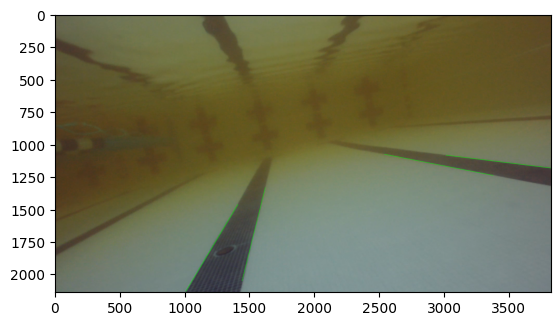

In [22]:
image = cv2.imread('lanes.png')
lines = lane_detection_code.detect_lines(image)
plt.imshow(lane_detection_code.drawLines(image, lines))

In [ ]:
image = cv2.imread('lanes.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 30, 43, apertureSize=3)
lines = cv2.HoughLinesP(edges, 2, np.pi/180, 100, minLineLength=667, maxLineGap=33)
lane_detection_code.get_slopes_intercepts(lines)

In [ ]:
#test detect_lanes function
imageInput = cv2.imread('lanes.png')
gray = cv2.cvtColor(imageInput, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 30, 43, apertureSize=3)
lines = cv2.HoughLinesP(edges, 2, np.pi/180, 100, minLineLength=667, maxLineGap=33)
lane_detection_code.detect_lanes(lines)

In [ ]:
#TEST DRAW_LANES
img = cv2.imread('lanes.png')
plt.imshow(img)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 30, 43, apertureSize=3)
lines = cv2.HoughLinesP(edges, 2, np.pi/180, 100, minLineLength=667, maxLineGap=33)
#print (lines)
lanes = lane_detection_code.detect_lanes(lines)
print(lanes)
lane_detection_code.draw_lanes(img, lanes)
plt.imshow(cv2.cvtColor(lane_detection_code.draw_lanes(img, lanes), cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
#TEST CLOSEST_LANE
img = cv2.imread('lanes.png')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 30, 43, apertureSize=3)
lines = cv2.HoughLinesP(edges, 2, np.pi/180, 100, minLineLength=667, maxLineGap=33)
lanes = lane_detection_code.detect_lanes(lines)
print(lanes)

lane_following.closest_lane(lanes)

In [ ]:
#TEST GET_LANE_CENTER
img = cv2.imread('lanes.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 30, 43, apertureSize=3)
lines = cv2.HoughLinesP(edges, 2, np.pi/180, 100, minLineLength=667, maxLineGap=33)
lanes = lane_detection_code.detect_lanes(lines)
lane_following.get_lane_center(lanes)

In [ ]:
#TEST RECOMMEND_DIRECTION
img = cv2.imread('lanes.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 30, 43, apertureSize=3)
lines = cv2.HoughLinesP(edges, 2, np.pi/180, 100, minLineLength=667, maxLineGap=33)
lanes = lane_detection_code.detect_lanes(lines)
center, slope = lane_following.get_lane_center(lanes)

lane_following.recommend_direction (center, slope)


In [ ]:
#TEST DRAW_CENTER_LINE

img = cv2.imread('lanes.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 30, 43, apertureSize=3)
lines = cv2.HoughLinesP(edges, 2, np.pi/180, 100, minLineLength=667, maxLineGap=33)
lanes = lane_detection_code.detect_lanes(lines)
lane_following.draw_center_line(img, lanes)
plt.imshow(cv2.cvtColor(lane_following.draw_center_line(img, lanes), cv2.COLOR_BGR2RGB))
plt.show()

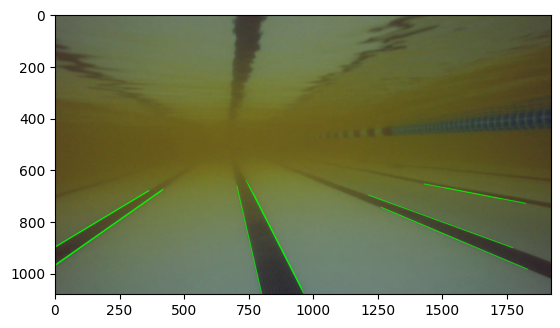

In [3]:
vid = cv2.VideoCapture('AUV_Vid.mkv')
ret, frame = vid.read()

#lines = cv2.HoughLinesP(edges, 2, np.pi/180, 10, minLineLength=10, maxLineGap=300) # detect lines
#lines = cv2.HoughLinesP(edges, 3, np.pi/180, 1, minLineLength=300, maxLineGap=10) # detect lines



def GetLaneList(vid):
    lineArray = []
    count = 0
    frequency = 10
    max_frames = 10
    ret, frame = vid.read()
    while ret and count < max_frames:
        if count % frequency == 0:
            lines = lane_detection_code.detect_lines(frame, 30, 20, 3, 300, 20)
            if lines is not None:
                for line in lines:
                    x1, y1, x2, y2 = line[0]
                    #cv2.line(cropped_frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                    plt.imshow(cv2.line(frame, (x1, y1), (x2, y2), (0, 255, 0), 2))
                # lanes = lane_detection_code.detect_lanes(lines)
                # lineArray.append(lanes)
        count += 1
    #     ret, frame = vid.read()
    # return lineArray

# def drawLines(img, lines, color = (0, 255, 0)):
    
#     try:
#         for line in lines:
#             x1, y1, x2, y2 = line[0]
#             cv2.line(img, (x1, y1), (x2, y2), color, 2)
#             slope = (y2-y1)/(x2-x1)
#             print(str(slope))
#     except TypeError:
#         print ("error")
    
#     return img
# ret, frame = vid.read()
# #lines = GetLaneList(vid)
# lines = lane_detection_code.detect_lines(frame, 49, 50, 3, 500, 40)
# plt.imshow(cv2.cvtColor(drawLines(frame, lines), cv2.COLOR_BGR2RGB))
# plt.show()

GetLaneList(vid)




In [3]:

def draw_lanes(frame, lanes):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 49, 50, apertureSize=3)
    lines = lane_detection_code.detect_lines(frame, 30, 20, 3, 300, 20)
    try:
        for lane in lanes:
            for line in lane:
                x1, y1, x2, y2 = line
                if math.isfinite(x1) and math.isfinite(y1) and math.isfinite(x2) and math.isfinite(y2):
                    x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
                    cv2.line(frame,(x1,y1),(x2,y2),(255, 0, 255), 2)
    except TypeError:
        pass
    return frame

video = cv2.VideoCapture('AUV_Vid.mkv')
ret, frame = video.read()
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 30, 43, apertureSize=3)
lines = lane_detection_code.detect_lines(frame, 30, 100, 3, 230, 15)
lanes = lane_detection_code.detect_lanes(lines)
count = 0
frequency = 1
fps = int(video.get(cv2.CAP_PROP_FPS))
width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))

output_file = 'iamdying3.avi'
fourcc = cv2.VideoWriter_fourcc(*'XVID')
output_video = cv2.VideoWriter(output_file, fourcc, 30, (width, height))

max_frames = 300

ret, frame = video.read()
count = 0
frequency = 1


while ret and count < max_frames:
    
    if count % frequency == 0:
        lines = lane_detection_code.detect_lines(frame, 95, 100, 3, 230, 25)
        lanes = lane_detection_code.detect_lanes(lines)
        processed_frame = draw_lanes(frame, lanes)
        output_video.write(processed_frame)

    count += 1
    ret, frame = video.read()

video.release()
output_video.release()


/home/erin/cv-intro/lane_detection_code.py:92: RuntimeWarning: divide by zero encountered in scalar divide
  xPoint = ((slopeList[i] * xInterceptList[i]) - (slopeList[j] * xInterceptList[j]))/(slopeList[i]-slopeList[j])
/home/erin/cv-intro/lane_detection_code.py:56: RuntimeWarning: divide by zero encountered in scalar divide
  slope = (y2-y1)/(x2-x1)
/home/erin/cv-intro/lane_detection_code.py:92: RuntimeWarning: invalid value encountered in scalar divide
  xPoint = ((slopeList[i] * xInterceptList[i]) - (slopeList[j] * xInterceptList[j]))/(slopeList[i]-slopeList[j])


In [18]:
video = cv2.VideoCapture('AUV_Vid.mkv')
ret, frame = video.read()
cropped_frame = frame[200:738, 0:412]
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 30, 10, apertureSize=3)
#lines = cv2.HoughLinesP(edges, 2, np.pi/180, 10, minLineLength=10, maxLineGap=300)
lines = lane_detection_code.detect_lines(frame, 30, 20, 3, 300, 25)

lanes = lane_detection_code.detect_lanes(lines)
count = 0
frequency = 1
fps = int(video.get(cv2.CAP_PROP_FPS))
width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))

# output_file = 'pleasework.avi'
# fourcc = cv2.VideoWriter_fourcc(*'XVID')
# output_video = cv2.VideoWriter(output_file, fourcc, 30, (width, height))

max_frames = 60

while ret and count < max_frames:
    #if count % frequency == 0:
        
    print (lane_detection_code.detect_lines(frame, 30, 20, 3, 300, 25))
    # processed_frame = lane_detection_code.draw_lanes(frame, lanes)
    # plt.imshow(cv2.cvtColor(lane_detection_code.draw_lanes(frame, lanes), cv2.COLOR_BGR2RGB))
    # plt.show()
    count += 1
        


[[[1008  626 1374  759]]

 [[1231  732 1918 1023]]

 [[1415  772 1907  952]]

 [[ 737  640  958 1073]]

 [[ 959  624 1500  843]]

 [[   1  969  430  669]]

 [[1503  669 1874  741]]

 [[1549  822 1919  957]]

 [[1569  669 1916  730]]

 [[   0  897  360  681]]

 [[ 974  631 1388  799]]

 [[ 695  640  797 1079]]

 [[   3  896  362  681]]

 [[   1  967  431  666]]

 [[1310  733 1619  845]]

 [[1551  676 1912  746]]

 [[   0  967  432  665]]

 [[   2  898  386  668]]

 [[1509  849 1918 1022]]

 [[ 756  674  962 1078]]

 [[ 701  656  797 1072]]

 [[1353  785 1805  976]]

 [[1296  630 1728  714]]

 [[1014  629 1346  750]]

 [[ 765  689  956 1064]]

 [[   1  970  372  710]]]
[[[1008  626 1374  759]]

 [[1231  732 1918 1023]]

 [[1415  772 1907  952]]

 [[ 737  640  958 1073]]

 [[ 959  624 1500  843]]

 [[   1  969  430  669]]

 [[1503  669 1874  741]]

 [[1549  822 1919  957]]

 [[1569  669 1916  730]]

 [[   0  897  360  681]]

 [[ 974  631 1388  799]]

 [[ 695  640  797 1079]]

 [[   3  896

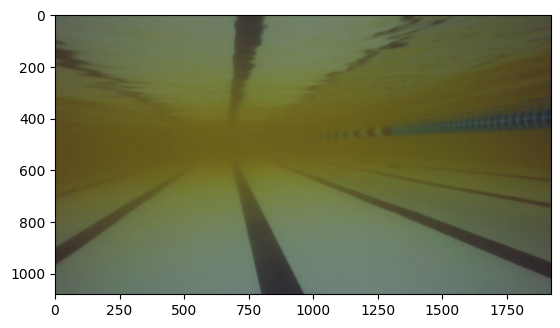

In [28]:
video = cv2.VideoCapture('AUV_Vid.mkv')
ret, frame = video.read()
count = 0
max_frames = 1

while ret and count < max_frames:
    plt.imshow(frame)
    count += 1

In [4]:

def draw_center_line(frame, lanes):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 49, 50, apertureSize=3)
    lines = lane_detection_code.detect_lines(frame, 30, 20, 3, 300, 20)
    center_intercept, center_slope = lane_following.get_lane_center(lanes)
    try:
        if center_intercept != None:
            center_intercept = int(center_intercept)
            center_lane = lane_following.closest_lane(lanes)
            z1 = center_intercept
            z1 = int(z1)    
            x_1, y_1, x_2, y_2 = center_lane[0]
            if math.isfinite(x_1) and math.isfinite(y_1) and math.isfinite(x_2) and math.isfinite(y_2):
                x_1, y_1, x_2, y_2 = int(x_1), int(y_1), int(x_2), int(y_2)
            x1, y1, x2, y2 = center_lane[1]
            if math.isfinite(x1) and math.isfinite(y1) and math.isfinite(x2) and math.isfinite(y2):
                x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
            x_intercept_center = (x_2 + x2)/2
            if math.isfinite(x_intercept_center):
                x_intercept_center = int(x_intercept_center)
            cv2.line(frame, (z1, y_1), (x_intercept_center, y_2), (0, 255, 255), 2)
    except TypeError:
        pass
    return frame
    try:
        for lane in lanes:
            for line in lane:
                x1, y1, x2, y2 = line
                if math.isfinite(x1) and math.isfinite(y1) and math.isfinite(x2) and math.isfinite(y2):
                    x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
                    cv2.line(frame,(x1,y1),(x2,y2),(255, 0, 255), 2)
    except TypeError:
        pass
    return frame

video = cv2.VideoCapture('AUV_Vid.mkv')
ret, frame = video.read()
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 30, 43, apertureSize=3)
lines = lane_detection_code.detect_lines(frame, 30, 100, 3, 230, 15)
lanes = lane_detection_code.detect_lanes(lines)
count = 0
frequency = 1
fps = int(video.get(cv2.CAP_PROP_FPS))
width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))

output_file = 'draw_center_line.avi'
fourcc = cv2.VideoWriter_fourcc(*'XVID')
output_video = cv2.VideoWriter(output_file, fourcc, 30, (width, height))

max_frames = 300

ret, frame = video.read()
count = 0
frequency = 1


while ret and count < max_frames:
    
    if count % frequency == 0:
        lines = lane_detection_code.detect_lines(frame, 100, 100, 3, 230, 20)
        lanes = lane_detection_code.detect_lanes(lines)
        processed_frame = draw_center_line(frame, lanes)
        output_video.write(processed_frame)

    count += 1
    ret, frame = video.read()

video.release()
output_video.release()


1457.864
[1457.864, 2138, 789.7647058823766, 562.2941176471145]
[1461.377049180328, 2138, 789.7647058823766, 562.2941176471145]
1457.864
1461.5862068965516
[1461.5862068965516, 2138, -246.38461538467217, -1888.9230769232108]
[1464.3007518796992, 2138, -246.38461538467217, -1888.9230769232108]
1461.5862068965516
1465.6370967741937
[1465.6370967741937, 2138, -6274.000000000115, -16142.285714285983]
[1467.473309608541, 2138, -6274.000000000115, -16142.285714285983]
1465.6370967741937
1479.121212121212
[1479.121212121212, 2138, 580.9999999999814, 20.999999999956344]
[1477.1164772727273, 2138, 580.9999999999814, 20.999999999956344]
1479.121212121212
1491.3032490974729
[1491.3032490974729, 2138, 475.71428571422416, -266.4285714287171]
[1493.5398773006136, 2138, 475.71428571422416, -266.4285714287171]
1491.3032490974729
1496.0
[1496.0, 2138, 57.53846153842457, -1267.7692307693183]
[1494.9543726235743, 2138, 57.53846153842457, -1267.7692307693183]
1496.0
1499.3764258555134
[1499.3764258555134,

/home/erin/cv-intro/lane_following.py:30: RuntimeWarning: invalid value encountered in scalar divide
  slope1 = (y1-y2)/(x_1-x2)
/home/erin/cv-intro/lane_following.py:33: RuntimeWarning: invalid value encountered in scalar divide
  slope2 = (y1-y2)/(x1-x2)


1451.9144602851325
1451.9144602851325
1453.5250965250966
1453.5250965250966
5713.166666666666
[1453.5250965250966, 2138, 2451.5945945946664, 4888.000000000198]
[1452.3453453453453, 2138, 2451.5945945946664, 4888.000000000198]
1451.9144602851325
1451.9144602851325
1453.5250965250966
1453.5250965250966
5713.166666666666
1451.7466666666667
1451.7466666666667
1452.5410447761194
1452.5410447761194
1449.9885496183206
[1452.5410447761194, 2138, 2862.7391304348375, 6034.217391304499]
[1449.9885496183206, 2138, 2862.7391304348375, 6034.217391304499]
1451.7466666666667
1451.7466666666667
1452.5410447761194
1452.5410447761194
1449.9885496183206
1426.0301886792454
1426.0301886792454
1429.6767955801106
[1429.6767955801106, 2138, 564.0000000000229, -368.99999999993406]
[1431.4740484429067, 2138, 564.0000000000229, -368.99999999993406]
1426.0301886792454
1426.0301886792454
1429.6767955801106
1428.7436399217222
[1428.7436399217222, 2138, 587.3648068668964, -304.86695278986326]
[1426.479674796748, 2138